In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# logistic regression
from sklearn.linear_model import LogisticRegression

In [2]:
# read in data
df = pd.read_csv('cleaned_data.csv')

# list all column names without ...
pd.set_option('display.max_columns', None)
df.head()

C:\Users\gian\AppData\Local\Temp\ipykernel_13064\689264397.py:2: DtypeWarning: Columns (22,36,37,46,47,48,49,50,51,52,53,54,56,112,113,118) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('cleaned_data.csv')


,Reporting Railroad Name,Report Year,Accident Number,Accident Year,Accident Month,Other Railroad Name,Other Accident Number,Other Accident Year,Other Accident Month,Maintenance Railroad Name,Maintenance Accident Number,Maintenance Accident Year,Maintenance Accident Month,Grade Crossing ID,Day,Date,Time,Accident Type,Hazmat Cars,Hazmat Cars Damaged,Hazmat Released Cars,Persons Evacuated,Subdivision,Division Code,Division,Station,Milepost,State Abbreviation,State Name,County Name,District,Temperature,Visibility,Weather Condition,Track Type,Track Name,Track Class,Track Density,Train Direction,Equipment Type,Equipment Attended,Train Number,Train Speed,Recorded Estimated Speed,Maximum Speed,Gross Tonnage,Signalization,Method of Operation,Adjunct Code 1,Adjunct Code Name 1,Adjunct Code 2,Adjunct Code Name 2,Adjunct Code 3,Adjunct Code Name 3,Remote Control Locomotive,First Car Initials,First Car Number,First Car Position,First Car Loaded,Causing Car Initials,Causing Car Number,Causing Car Position,Causing Car Loaded,Positive Alcohol Tests,Positive Drug Tests,Passengers Transported,Head End Locomotives,Mid Train Manual Locomotives,Mid Train Remote Locomotives,Rear End Manual Locomotives,Rear End Remote Locomotives,Derailed Head End Locomotives,Derailed Mid Train Manual Locomotives,Derailed Mid Train Remote Locomotives,Derailed Rear End Manual Locomotives,Derailed Rear End Remote Locomotives,Loaded Freight Cars,Loaded Passenger Cars,Empty Freight Cars,Empty Passenger Cars,Cabooses,Derailed Loaded Freight Cars,Derailed Loaded Passenger Cars,Derailed Empty Freight Cars,Derailed Empty Passenger Cars,Derailed Cabooses,Equipment Damage Cost,Track Damage Cost,Total Damage Cost,Primary Accident Cause,Contributing Accident Cause,Accident Cause,Engineers On Duty,Firemen On Duty,Conductors On Duty,Brakemen On Duty,Hours Engineers On Duty,Minutes Engineers On Duty,Hours Conductors On Duty,Minutes Conductors On Duty,Railroad Employees Killed,Railroad Employees Injured,Passengers Killed,Passengers Injured,Others Killed,Others Injured,Persons Killed For Reporting Railroad,Persons Injured For Reporting Railroad,Total Persons Killed,Total Persons Injured,Total Killed Form 54,Total Injured Form 54,Special Study 1,Special Study 2,Latitude,Longitude,Narrative,Joint Track Type,Joint Track Class,Class,Joint CD,Incident Key,Report Key,Reporting Railroad Company Grouping,Reporting Railroad Class,Reporting Railroad SMT Grouping,Reporting Parent Railroad Company Name,Reporting Railroad Holding Company,Other Railroad Company Grouping,Other Railroad Class,Other Railroad SMT Grouping,Other Parent Railroad Company Name,Other Railroad Holding Company,Maintenance Railroad Company Grouping,Maintenance Railroad Class,Maintenance Railroad SMT Grouping,Maintenance Parent Railroad Company Name,Maintenance Railroad Holding Company
0,Norfolk Southern Railway Company,2016.0,120068,16.0,4.0,NaN,NaN,NaN,NaN,Norfolk Southern Railway Company,120068,16.0,4.0,NaN,9.0,04/09/2016,5:30 AM,Derailment,0.0,0.0,0.0,0.0,GEORGIA,NaN,NaN,MACON,242.00,GA,GEORGIA,BIBB,3.0,60.0,Dawn,Clear,Yard,EAST PULLBACK,1,0000,North,Yard/switching,Yes,GM44,6.0,Estimated,6,0.0,Not Signaled,Other Than Main Track,K,Restricted Speed or Equivalent,NaN,NaN,NaN,NaN,Not a remotely controlled operation,TILX,150060,13.0,No,NaN,NaN,0.0,NaN,0.0,0.0,No,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,0.0,20.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,36200.0,0.0,41720.0,Failure to comply with restricted speed or its...,NaN,Failure to comply with restricted speed or its...,1.0,0.0,1.0,0.0,6.0,40.0,6.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OTH,000-000-000,32.813658,-83.622785,WHILE PULLING NORTH THE GM42 FAILED TO COMPLY ...,Yard,1,CL,3.0,NS120068201604,NS120068201604,NaN,Class 1,SMT-3 - Norfolk Southern,Norfolk Southern Railway Company,Norfolk Southern Railway Company,NaN,NaN,NaN,NaN,NaN,NaN,Class 1,SMT-3 - Norfolk Southern,Norfolk Southern Railway Company,Norfolk Southern Railway Company
1,Norfolk Southern Railway Compa

In [3]:
# get all Accident Types
df['Accident Type'].unique()

array(['Derailment', 'Side collision', 'Hwy-rail crossing',
       'Other impacts', 'Other (describe in narrative)',
       'Rear end collision', 'Fire/violent rupture', 'Obstruction',
       'Raking collision', 'Head on collision', 'Broken train collision',
       'RR grade crossing', 'Explosion-detonation', nan], dtype=object)

In [4]:
# # array(['Derailment', 'Side collision', 'Hwy-rail crossing', 'Obstruction',
# #        'Other (describe in narrative)', 'Raking collision',
# #        'Other impacts', 'Fire/violent rupture', 'Head on collision',
# #        'Rear end collision', 'Broken train collision',
# #        'RR grade crossing', nan, 'Explosion-detonation'], dtype=object)
# # Give a severity score to each accident type

# # Remove other impacts and other (describe in narrative) because they are too vague
# df = df[df['Accident Type'] != 'Other impacts']
# df = df[df['Accident Type'] != 'Other (describe in narrative)']

# severity = {'Derailment': 5, 'Side collision': 4, 'Hwy-rail crossing': 2, 'Obstruction': 4,
#             'Raking collision': 3, 'Fire/violent rupture': 3, 'Head on collision': 3,
#             'Rear end collision': 3, 'Broken train collision': 3, 'RR grade crossing': 3,
#             'Explosion-detonation': 2}

In [4]:
# Want to see if certain weather conditions are more likely to cause certain accidents types
accident_types = df['Accident Type'].unique()
weather_types = df['Weather Condition'].unique()
weather_types

array(['Clear', 'Snow', 'Cloudy', 'Rain', 'Sleet', 'Fog', nan],
      dtype=object)

In [12]:
# find the number of accidents for each weather condition
weather_counts = df['Weather Condition'].value_counts()
weather_counts

Clear     138035
Cloudy     53649
Rain       15236
Snow        5233
Fog         3130
Sleet        421
Name: Weather Condition, dtype: int64

In [19]:
# find the total amount of Raking collisions for each weather condition
raking_collisions = df[df['Accident Type'] == 'Raking collision']   
raking_collisions = raking_collisions['Weather Condition'].value_counts()
raking_collisions

Clear     2847
Cloudy    1056
Rain       308
Snow        89
Fog         82
Sleet       11
Name: Weather Condition, dtype: int64

In [9]:
# Weather Condition, Temperature, Visibility, Accident Month
# use these to predict accident type
# support vector machine
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Give each row an id
df['id'] = df.index

# preprocessing data
X = df[['id', 'Weather Condition', 'Temperature', 'Visibility', 'Accident Month']]
# Convert the categorical data into numerical data
X = pd.get_dummies(X)
# Drop the column with NaN values
X = X.dropna(axis=1)

y = df[['id', 'Accident Type']]
# drop rows with NaN values
y = y.dropna(axis=0)

# keep only rows that have a matching id in both X and y
X = X[X['id'].isin(y.index)]
y = y[y.index.isin(X['id'])]

# Drop id column
X = X.drop('id', axis=1)
y = y.drop('id', axis=1)

# ravel y to make it a 1d array
y = y.values.ravel()

c:\Users\gian\miniconda3\envs\treten\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LibSVM]

0.6434289680703378

In [ ]:
from sklearn.model_selection import KFold
# split data into training and testing with kfold cross validation
kf = KFold(n_splits=5, shuffle=True)
kf.get_n_splits(X)

# split data into training and testing  
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# model = SVC(kernel='rbf', verbose=1)
# model.fit(X_train, y_train)
# train model
model = SVC(kernel='rbf', verbose=1)
model.fit(X_train, y_train)


In [29]:
# test model
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.6434289680703378

In [30]:
# get the coefficients of the support vector classifier
# coefficients = model.coef_
# coefficients.shape
# features = X.columns

# coefficients


# get coefficients of the support vector classifier


AttributeError: coef_ is only available when using a linear kernel

TypeError: can only concatenate str (not "float") to str

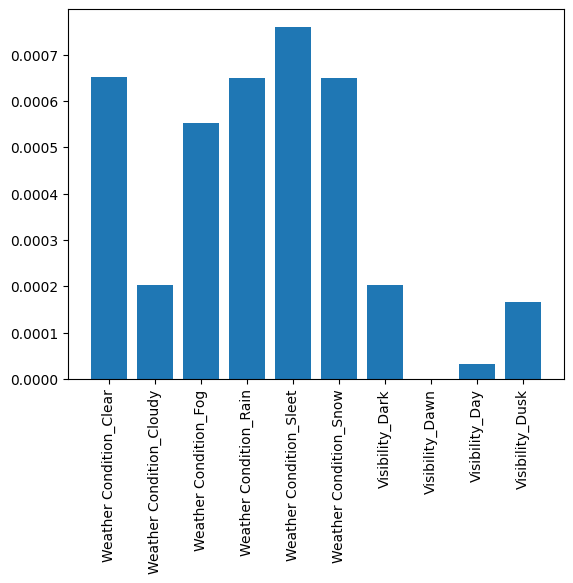

In [43]:
# The only one that really stands out is the Hwy-rail crossing
val = 13

features = X.columns
# bar plot coef[0]
plt.bar([x for x in range(len(coefficients[0]))], coefficients[val])
# add labels
plt.xticks([x for x in range(len(coefficients[0]))], features, rotation='vertical')
plt.title('Coefficients for ' + accident_types[val])
plt.savefig('coefficients for ' + accident_types[val] + '.png')
plt.show()


In [ ]:
# instead lets try a random forest
from sklearn.ensemble import RandomForestClassifier

# train model
model = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
model.fit(X_train, y_train)

# test model
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)



In [ ]:
# get the coefficients of the support vector classifier
coefficients = model.feature_importances_

# bar plot coef[0]